## Imports

In [18]:
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [92]:
def rgb(img):
    """Convierte imagenes de BGR a RGB, para poder ser mostradas en un notebook."""
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


def put_gaze_annotation(img,gaze,pose):
    """Agrega una flecha sobre la imagen apuntando en la dirección de la mirada."""
    # Image dimensions
    h, w, _ = img.shape

    # Define the center point of the face (you can customize this based on your face detection results)
    face_center = (int(w / 2), int(h *0.6/ 2))

    # Deifne arrow parameters
    color_green = (0, 255, 0)
    color_blue = (0, 0, 255) 
    color_red = (255, 0, 0) 
    thickness = 2

    arrow_length = 0.7*np.sqrt(h**2+w**2)
    # Calculate the end point using gaze values (you can tweak the scale if needed)
    pitch = gaze[0]
    yaw = gaze[1]
    dx = np.cos(pitch)*np.sin(yaw)
    dy = np.sin(pitch)
    end_point = (
        int(face_center[0] - arrow_length * dx),  # Horizontal component (yaw)
        int(face_center[1] - arrow_length * dy)   # Vertical component (pitch, inverted Y)
    )



    img2 = img.copy()
    cv2.arrowedLine(img2, face_center, end_point, color_green, thickness, tipLength=0.2)

    
    arrow_length = 0.3*np.sqrt(h**2+w**2)
    pitch = gaze[0]*np.pi
    yaw = gaze[1]*np.pi
    dx = np.sin(yaw)
    dy = np.sin(pitch)    
    end_point = (
        int(face_center[0] - arrow_length * dx),  # Horizontal component (yaw)
        int(face_center[1] - arrow_length * dy)   # Vertical component (pitch, inverted Y)
    )
    cv2.arrowedLine(img2, face_center, end_point, color_red, thickness, tipLength=0.2)

    arrow_length = 0.3*np.sqrt(h**2+w**2)
    pitch = gaze[0]*np.pi
    yaw = gaze[1]*np.pi
    dx = yaw
    dy = pitch
    end_point = (
        int(face_center[0] - arrow_length * dx),  # Horizontal component (yaw)
        int(face_center[1] - arrow_length * dy)   # Vertical component (pitch, inverted Y)
    )
    cv2.arrowedLine(img2, face_center, end_point, color_blue, thickness, tipLength=0.2)

    return img2

## Lectura del dataset en formato h5

Usando h5py

/tmp/ipykernel_497955/100446617.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(images[i_key],dtype=np.uint8)
/tmp/ipykernel_497955/100446617.py:24: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  gaze = np.array(gaze[i_key],dtype=float)
/tmp/ipykernel_497955/100446617.py:25: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  pose = np.array(pose[i_key],dtype=float)


Gaze: [-0.17816797 -0.10991646]
Pose: [0.5684377  0.05389102]


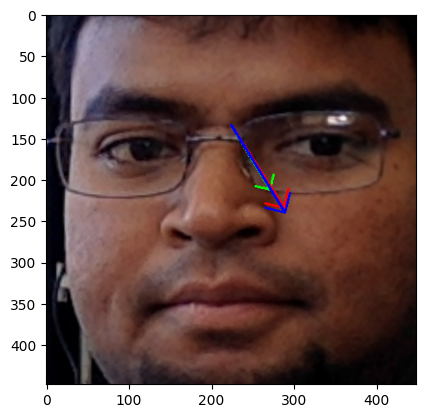

In [121]:
# Open the file in read mode
with h5py.File('./datasets/MPIIFaceGaze.h5', 'r') as file:
    # List all groups and datasets
    # print(list(file.keys()))
    
    # Access a specific dataset
    person = f"p{randint(0,len(file)-1):02d}"
    dataset = file[person]

    images = dataset["image"]
    gaze = dataset["gaze"]
    pose = dataset["pose"]

    i = randint(1,len(images)-1)

    i_key = f"{i:04d}"

    # print(i_key)
    # print(images.keys())
    # print(gaze.keys())
    # print(pose.keys())

    img = np.array(images[i_key],dtype=np.uint8)
    gaze = np.array(gaze[i_key],dtype=float)
    pose = np.array(pose[i_key],dtype=float)

    plt.imshow(put_gaze_annotation(rgb(img),gaze,pose))
    print(f"Gaze: {gaze}")
    print(f"Pose: {pose}")
